In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-19 00:06:34.719021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 00:06:34.719257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 00:06:34.877387: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
os.listdir('/kaggle/input/leaf-disease-dataset/Leaf Disease Detection')

['Common_Rust', 'Blight', 'Healthy', 'Gray_Leaf_Spot']

In [3]:
len(os.listdir('/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight'))

1146

In [4]:
len(os.listdir('/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Common_Rust'))

1306

In [5]:
len(os.listdir('/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Gray_Leaf_Spot'))

574

In [6]:
len (os.listdir('/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Healthy'))

1162

In [7]:
import cv2

In [8]:
img = cv2.imread('/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight/Corn_Blight (1).jpeg')

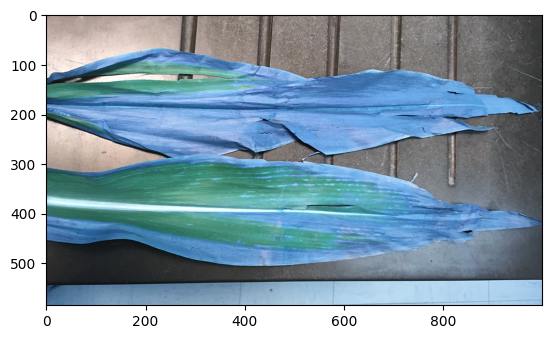

In [9]:
plt.imshow(img)

In [10]:
img = '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight'

img

'/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight'

In [11]:
urls = os.listdir('/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight')

In [12]:
path = "/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight/" + urls[0]

path


'/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight/Corn_Blight (842).JPG'

In [13]:

def loadImages(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = os.path.join(path, urls[i])
        img = cv2.imread(img_path)
        img = img / 255.0
        # if we want to resize the images
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(target)
    images = np.asarray(images)
    return images, labels


In [14]:
blight_path = "/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight"
blightUrl   = os.listdir(blight_path)
blightImages, blightTargets = loadImages(blight_path, blightUrl, 1)

In [15]:
len(blightTargets), len(blightImages)

(1146, 1146)

In [16]:
commonrust_path = "/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Common_Rust"
commonrust_Url = os.listdir(commonrust_path)
commonrustImages, commonrustTargets = loadImages(commonrust_path,commonrust_Url, 0)

In [17]:
len(commonrustTargets), len(commonrustImages)

(1306, 1306)

In [18]:
greyleafspot_path = "/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Gray_Leaf_Spot"
greyleafspot_Url = os.listdir(greyleafspot_path)
greyleafspotImages, greyleafspotTargets = loadImages (greyleafspot_path, greyleafspot_Url, 2)

In [19]:
len(greyleafspotTargets), len(greyleafspotImages)

(574, 574)

In [20]:
healthy_path = '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Healthy'
healthy_Url = os.listdir(healthy_path)
healthyImages,healthyTargets = loadImages (healthy_path, healthy_Url, 3)

In [21]:
len(healthyTargets), len(healthyImages)

(1162, 1162)

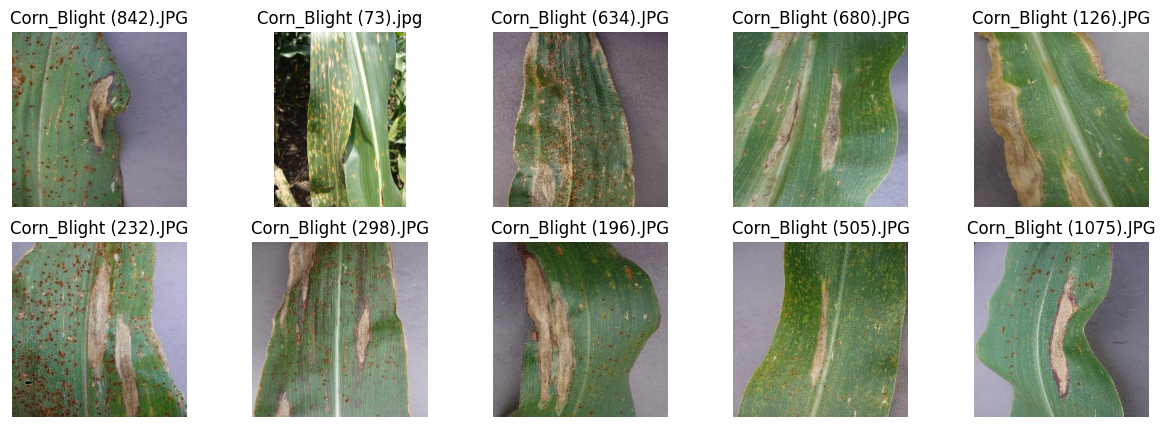

In [22]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


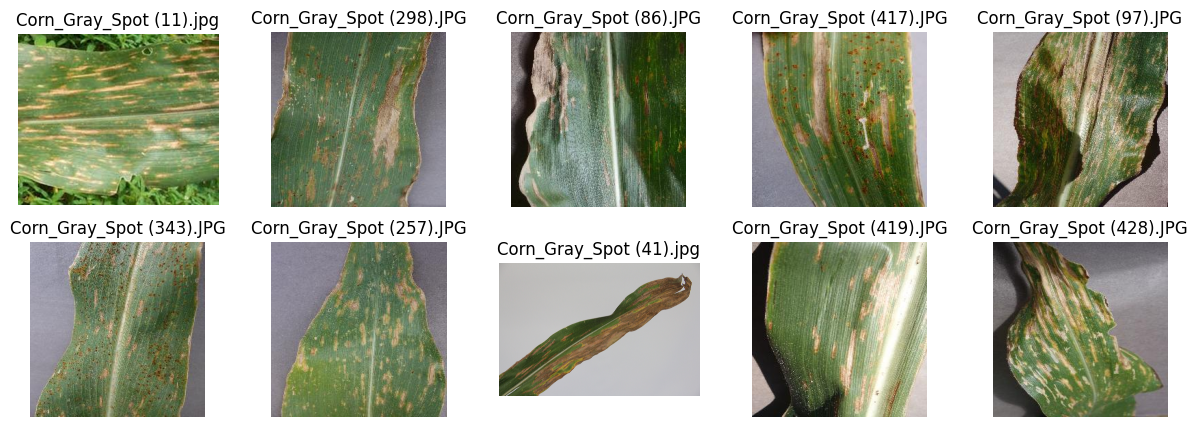

In [24]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Gray_Leaf_Spot'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


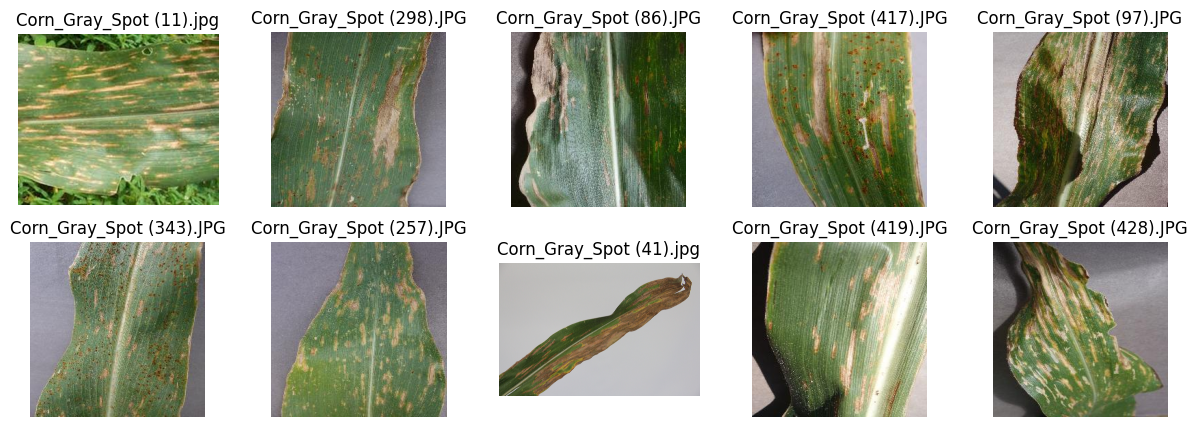

In [25]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Gray_Leaf_Spot'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


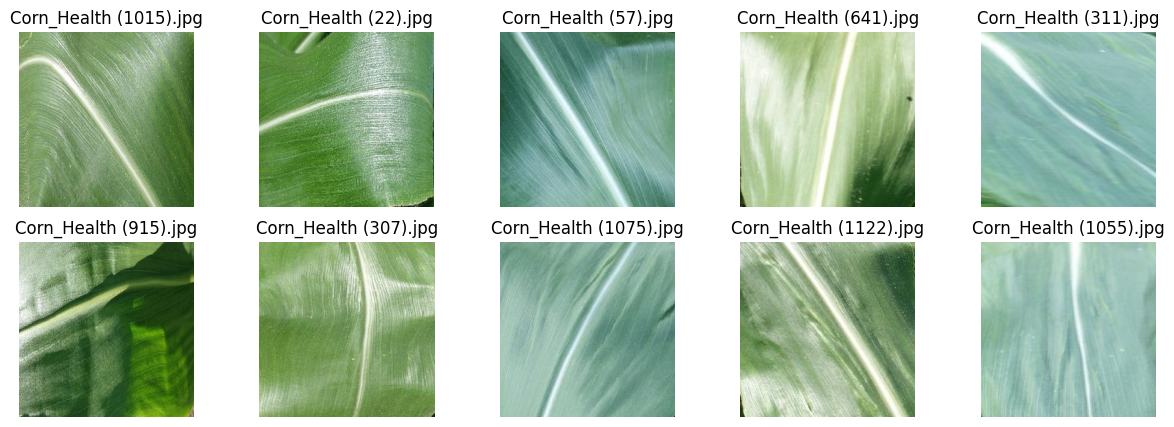

In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Healthy'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


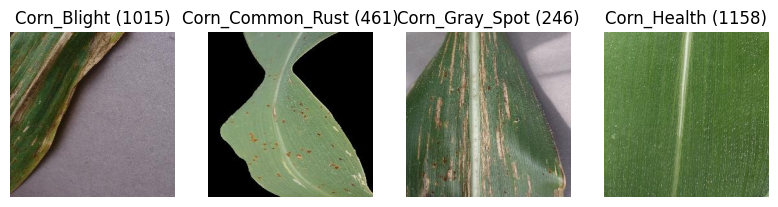

In [27]:
import random
directories = [
    '//kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight',
    '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Common_Rust',
    '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Gray_Leaf_Spot',
    '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Healthy'
]

# Initialize a list to store sampled image filenames
sampled_filenames = []

# Randomly select 1 image from each directory
for directory in directories:
    filenames = os.listdir(directory)
    sampled_filenames.append(random.choice(filenames))

# Plot the sampled images
plt.figure(figsize=(20, 10))
for i, filename in enumerate(sampled_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directories[i], filename))
    plt.subplot(4, 8, i + 1)  # Arrange subplots in a single row
    plt.imshow(img)
    plt.title(filename.split('.')[0])  # Display filename without extension
    plt.axis('off')  # Turn off axis labels
plt.show()


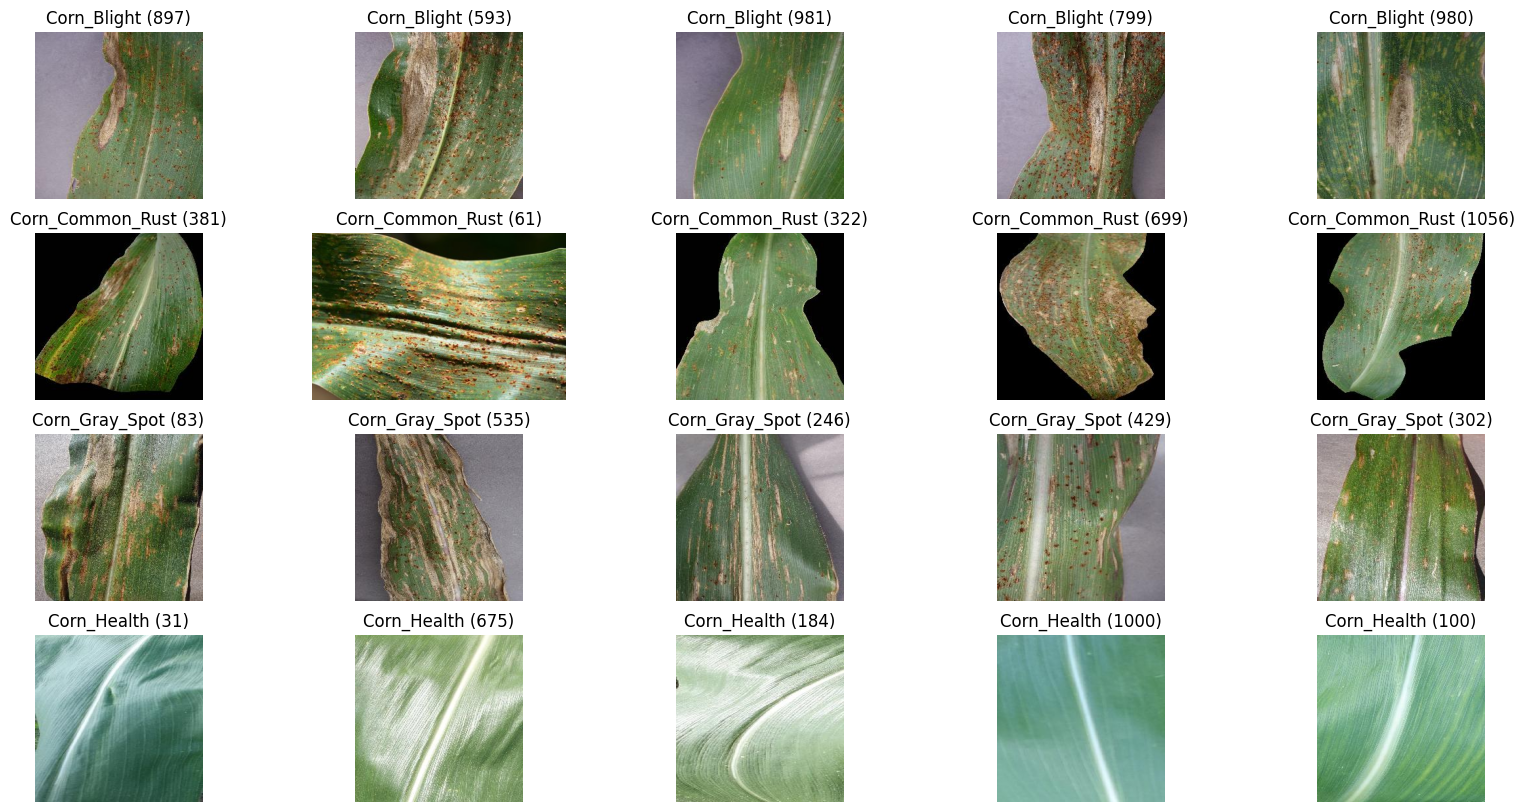

In [31]:

import random
directories = [
                '//kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Blight',
                '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Common_Rust',
                '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Gray_Leaf_Spot',
                '/kaggle/input/leaf-disease-dataset/Leaf Disease Detection/Healthy' ]
 

# Initialize a list to store sampled image filenames
sampled_filenames = []

# Randomly select 5 images from each directory
for directory in directories:
    filenames = os.listdir(directory)
    sampled_filenames.extend(random.sample(filenames, 5))

# Plot the sampled images
plt.figure(figsize=(20, 10))
for i, filename in enumerate(sampled_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directories[i // 5], filename))
    plt.subplot(4, 5, i + 1)  # Arrange subplots in a grid
    plt.imshow(img)
    plt.title(filename.split('.')[0])  # Display filename without extension
    plt.axis('off')  # Turn off axis labels
plt.show()


In [32]:
blightImages.shape

(1146, 100, 100, 3)

In [34]:
commonrustImages.shape

(1306, 100, 100, 3)

In [35]:
greyleafspotImages.shape

(574, 100, 100, 3)

In [36]:
healthyImages.shape

(1162, 100, 100, 3)

In [37]:
data = np.r_[blightImages, commonrustImages, greyleafspotImages, healthyImages]

In [38]:
data.shape

(4188, 100, 100, 3)

In [39]:
targets = np.r_[blightTargets, commonrustTargets, greyleafspotTargets, healthyTargets]

In [40]:
targets.shape

(4188,)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

In [43]:
import tensorflow as tf

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [45]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes (covid, normal, pneumonia, lungopacity)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,806,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,862,980 (7.11 MB)

 Trainable params: 1,862,980 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train,batch_size=32,epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 30s 271ms/step - accuracy: 0.6665 - loss: 0.8320 - val_accuracy: 0.8377 - val_loss: 0.3852
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 266ms/step - accuracy: 0.8508 - loss: 0.3482 - val_accuracy: 0.8699 - val_loss: 0.3144
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - accuracy: 0.8875 - loss: 0.2895 - val_accuracy: 0.8687 - val_loss: 0.3309
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 270ms/step - accuracy: 0.9220 - loss: 0.2128 - val_accuracy: 0.8520 - val_loss: 0.3868
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 264ms/step - accuracy: 0.9282 - loss: 0.1821 - val_accuracy: 0.8878 - val_loss: 0.3355


In [49]:
y_pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


### Visualising the training journey

In [50]:
type(history.history)

dict

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [56]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

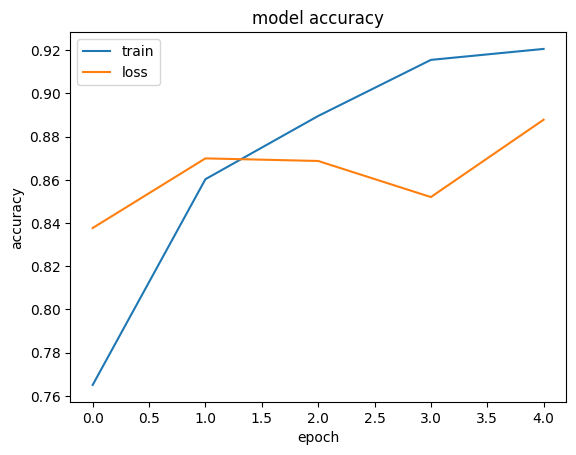

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

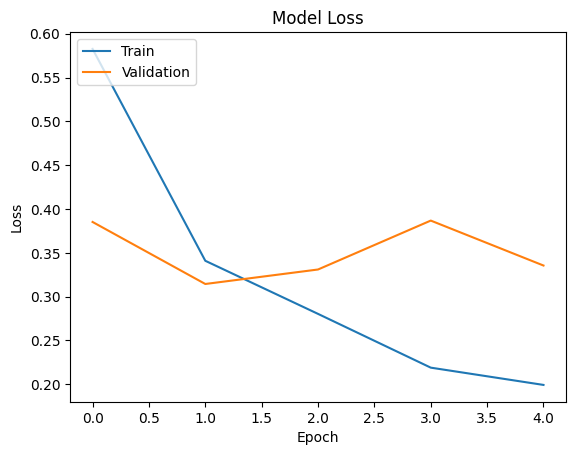

In [58]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
 In this model accuracy is 92%. we can detect the leaf disease in this accuracy.